<a href="https://colab.research.google.com/github/Adharsh0001/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Machine-Learning/main/petrol_consumption.csv")

In [3]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [7]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [9]:
dataset.describe() # Outliers are observed here using IQR

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [8]:
dataset = dataset.drop_duplicates()

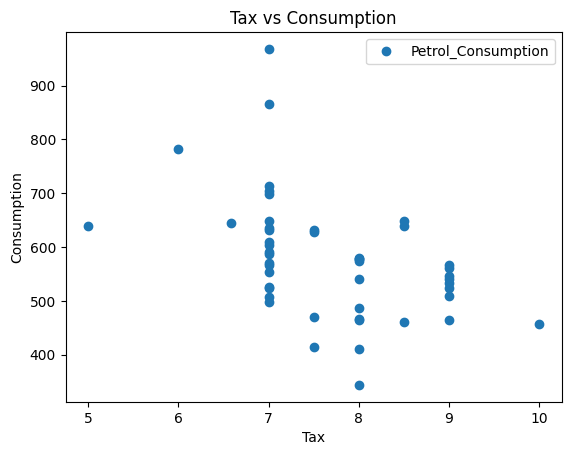

In [10]:
dataset.plot(x = "Petrol_tax", y = "Petrol_Consumption", style = "o")
plt.title("Tax vs Consumption")
plt.xlabel("Tax")
plt.ylabel("Consumption")
plt.show()

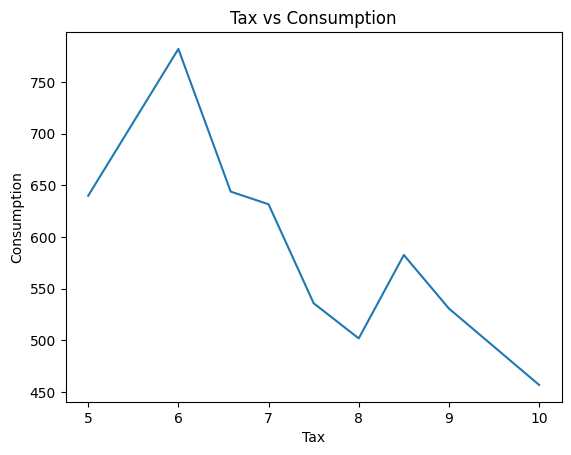

In [11]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.title("Tax vs Consumption")
plt.xlabel("Tax")
plt.ylabel("Consumption")
plt.show()

In [12]:
dataset[["Petrol_tax","Petrol_Consumption"]].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


As tax increases, petrol consumption decreases

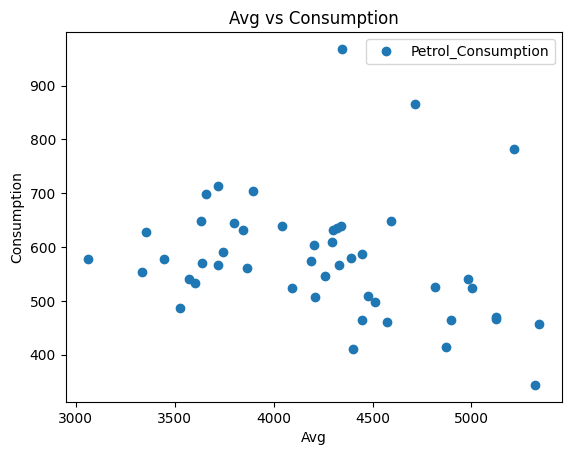

In [13]:
dataset.plot(x = "Average_income", y = "Petrol_Consumption", style = "o")
plt.title("Avg vs Consumption")
plt.xlabel("Avg")
plt.ylabel("Consumption")
plt.show()

In [14]:
dataset[["Average_income","Petrol_Consumption"]].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


There is a border line linear relationship

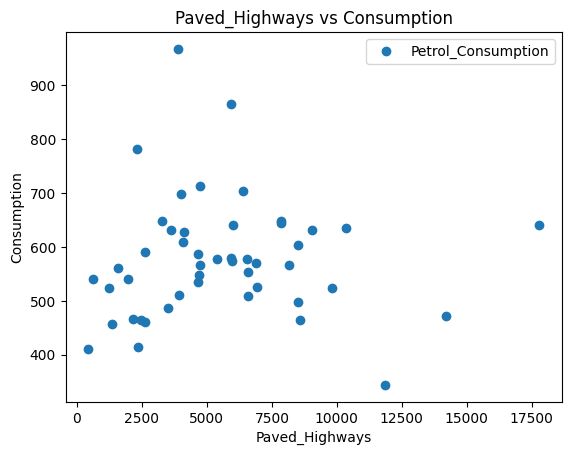

In [15]:
dataset.plot(x = "Paved_Highways", y = "Petrol_Consumption", style = "o")
plt.title("Paved_Highways vs Consumption")
plt.xlabel("Paved_Highways")
plt.ylabel("Consumption")
plt.show()

In [16]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


Correlation is too low, hence going for transforming the feature

Trying an square transformation

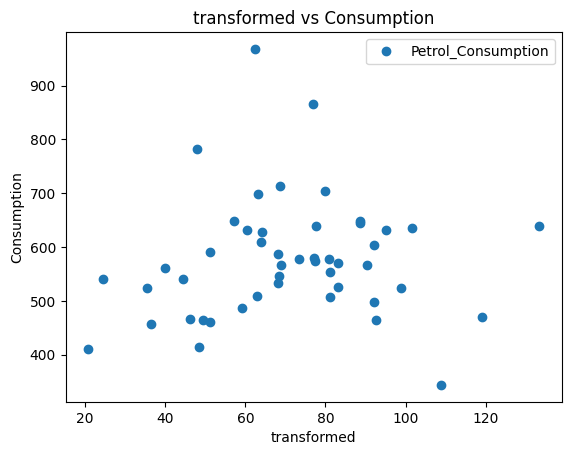

In [17]:
dataset["transformed"] = np.power(dataset["Paved_Highways"],0.5)
dataset.plot(x = "transformed", y = "Petrol_Consumption", style = "o")
plt.title("transformed vs Consumption")
plt.xlabel("transformed")
plt.ylabel("Consumption")
plt.show()

In [ ]:
dataset[["transformed","Petrol_Consumption"]].corr()

,transformed,Petrol_Consumption
transformed,1.000000,0.086698
Petrol_Consumption,0.086698,1.000000


since even after doing all the transforming for Paved Highways, we are neglecting that column for prediction

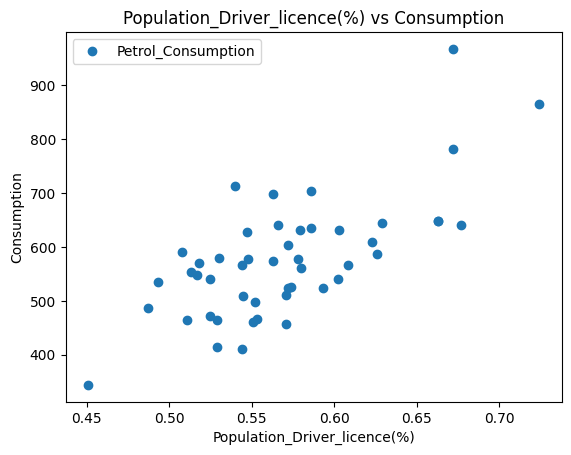

In [18]:
dataset.plot(x = "Population_Driver_licence(%)", y = "Petrol_Consumption", style = "o")
plt.title("Population_Driver_licence(%) vs Consumption")
plt.xlabel("Population_Driver_licence(%)")
plt.ylabel("Consumption")
plt.show()

There is an positive correlation as it has value 0.6

In [19]:
X = dataset[["Petrol_tax","Average_income","Population_Driver_licence(%)"]].values
Y = dataset["Petrol_Consumption"].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =0)

Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying the ML

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,Y_train)

LinearRegression()

Printing the coeff M value for all the X features

In [23]:
coef_df = pd.DataFrame(regressor.coef_, ["Petrol_tax","Average_income","Population_Driver_license(%)"],columns = ["Coefficient"])
coef_df

,Coefficient
Petrol_tax,-29.564915
Average_income,-38.034850
Population_Driver_license(%),80.695238


In [ ]:
regressor.intercept_

583.9736842105262

Petrol Consumption = -29.56 * petrol tax + -38.03* Average_income + 80.69*Population_Driver_license + 583

Population_driver_licnese has the major impact, secondly average income followed by petrol tax. This can be found out only using scaled data